Here the goal is to find the fraudulent credit/debit card transactions. Everything except the time and amount has been reduced by a Principle Component Analysis (PCA) for privacy concerns.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [40]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard.csv") 
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
print(df.shape)
print(df.info())
print(df.describe())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

Visualize the data to investigate the frequency of the normal and fraudulent ones

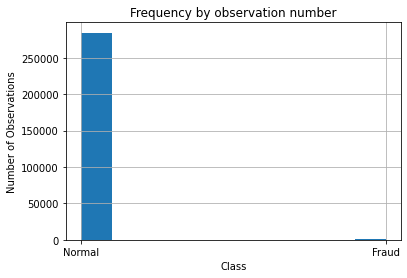

In [42]:
df['Class'].hist()
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

Split data to normal and fraudulent

In [43]:
normal_df = df[df['Class']==0]
print(normal_df.shape)
fraud_df = df[df['Class']==1]
fraud_df.shape

(284315, 31)


(492, 31)

In [44]:
normal_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [45]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normalize the data and generate train and test datasets

In [46]:
train, test = train_test_split(df, test_size=0.3, random_state=123)
train=train[train['Class']==0]
train.shape
x_train = train.drop(['Class'], axis=1)
y_test = test['Class']
x_test = test.drop(['Class'], axis=1)
stdScaler=StandardScaler()
x_train = stdScaler.fit_transform(x_train)
x_test = stdScaler.transform(x_test)

Generate the auto-encoder model

In [47]:
model = Sequential()
model.add(Dense(15, input_dim= 30))
model.add(Dense(7))
model.add(Dense(15))
model.add(Dense(30))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                120       
_________________________________________________________________
dense_11 (Dense)             (None, 30)                480       
Total params: 1,177
Trainable params: 1,177
Non-trainable params: 0
_________________________________________________________________


Fit the model

In [48]:
model.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [49]:
SeqMod = model.fit(x_train, x_train,
                    epochs=100,
                    batch_size=64,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=1)

Epoch 1/100
3110/3110 [==============================] - 7s 2ms/step - loss: 0.8322 - accuracy: 0.2055 - val_loss: 0.7246 - val_accuracy: 0.2614
Epoch 2/100
3110/3110 [==============================] - 6s 2ms/step - loss: 0.7047 - accuracy: 0.2630 - val_loss: 0.7209 - val_accuracy: 0.2772
Epoch 3/100
3110/3110 [==============================] - 6s 2ms/step - loss: 0.6927 - accuracy: 0.2791 - val_loss: 0.7202 - val_accuracy: 0.2934
Epoch 4/100
3110/3110 [==============================] - 6s 2ms/step - loss: 0.6893 - accuracy: 0.2915 - val_loss: 0.7178 - val_accuracy: 0.2947
Epoch 5/100
3110/3110 [==============================] - 7s 2ms/step - loss: 0.6956 - accuracy: 0.2927 - val_loss: 0.7195 - val_accuracy: 0.2963
Epoch 6/100
3110/3110 [==============================] - 6s 2ms/step - loss: 0.6971 - accuracy: 0.2933 - val_loss: 0.7184 - val_accuracy: 0.2947
Epoch 7/100
3110/3110 [==============================] - 6s 2ms/step - loss: 0.6911 - accuracy: 0.2922 - val_loss: 0.7218 - val_ac

Plot loss vs epochs for train and validation

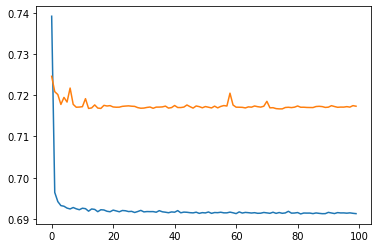

In [50]:
train_loss = SeqMod.history['loss']
val_loss = SeqMod.history['val_loss']
plt.figure()
plt.plot(train_loss)
plt.plot(val_loss)

Predict the test data

In [51]:
x_pred = model.predict(x_test)
Reconstruction_error = np.mean(np.power(x_test - x_pred, 2), axis=1)
True_class = y_test
df2 = pd.DataFrame(data={'Reconstruction_error': Reconstruction_error, 'True_class': True_class})
print(df2.head())
df2.describe()

        Reconstruction_error  True_class
73129               0.235174           0
229597              0.361507           0
220218              0.274601           0
198374              0.828073           0
167980              0.428560           0


,Reconstruction_error,True_class
count,85443.000000,85443.000000
mean,0.717349,0.001873
std,2.992815,0.043233
min,0.055115,0.000000
25%,0.271491,0.000000
50%,0.406153,0.000000
75%,0.634337,0.000000
max,259.750146,1.000000


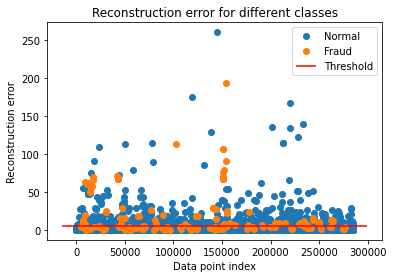

In [59]:
threshold_fixed = 5
groups = df2.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

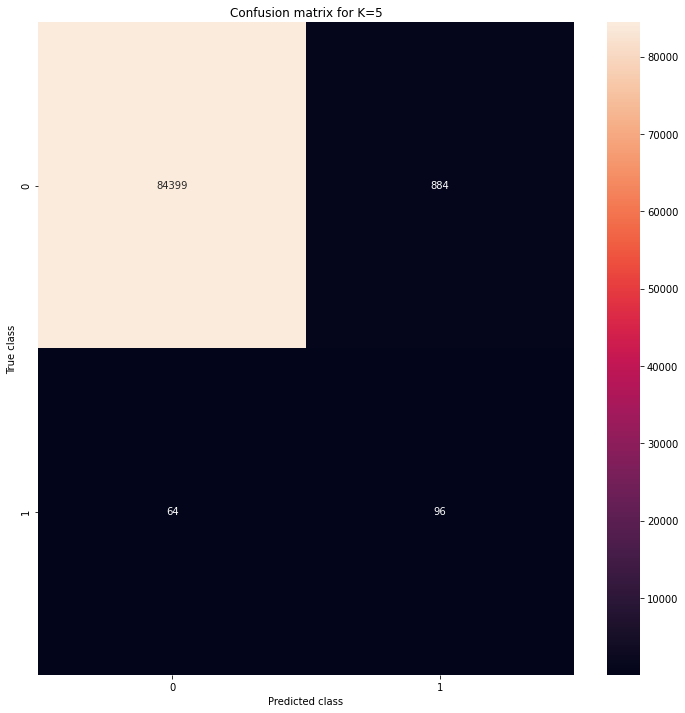

In [60]:
threshold_fixed = 5
pred_y1 = [1 if e > threshold_fixed else 0 for e in df2.Reconstruction_error.values]

conf_matrix1 = confusion_matrix(df2.True_class, pred_y1)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix1, annot=True, fmt="d");
plt.title("Confusion matrix for K=5")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Based on the output, the model can capture 60% (96/160) of fraudulent transactions and 98% (84399/85283) of normal transactions. It means that we cannot capture enough fraudulent transactions so we will reduce K.

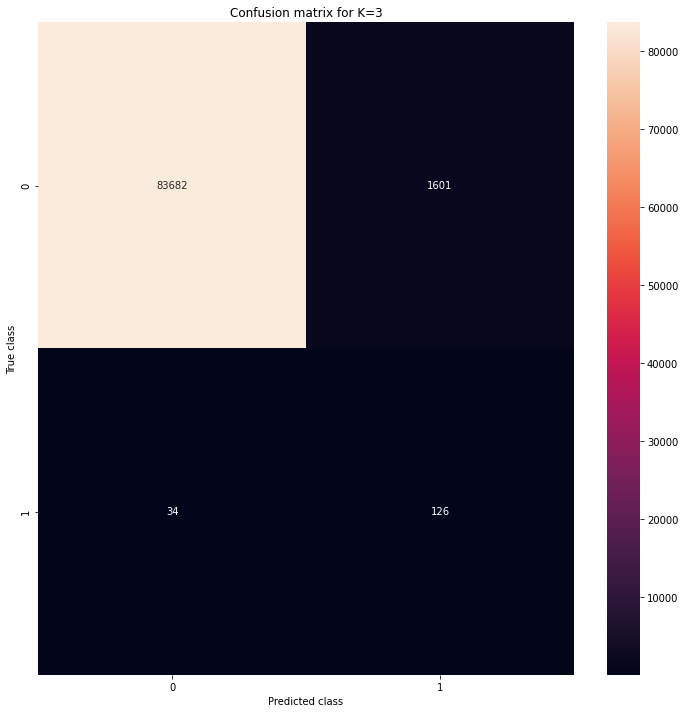

In [61]:
threshold_fixed = 3
pred_y2 = [1 if e > threshold_fixed else 0 for e in df2.Reconstruction_error.values]

conf_matrix2 = confusion_matrix(df2.True_class, pred_y2)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix2, annot=True, fmt="d");
plt.title("Confusion matrix for K=3")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Now, the model can capture 78% (1266/160) of fraudulent transactions and 98% (83682/85283) of normal transactions. So the model works well.